In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['grid.linewidth'] = 0

# Visualizing Big Datasets: Tools, Pitfalls, Experimental Example

## Importance of Data Visualization
We'll use part of the well-studied NYC Taxi trip database

![Image](./images/nyc_pickups_vs_dropoffs.jpg)

## Plotting very large datasets meaningfully

- provides clealear understanding
- aids decision making 

When working with large datasets, visualizations are often the only way available to understand the properties of that dataset -- there are simply too many data points to examine each one!  Thus it is very important to be aware of some common plotting problems that are minor inconveniences with small datasets but very serious problems with larger ones.

<img src="./images/6-blind-men-hans.jpg"  width="700" height="700"/>

<img src="./images/data_science_process.png"  width="500" height="500"/>

https://python-graph-gallery.com/

## Presentation Outine:
- Tools introduction
- Ratcave VR Acuity introduction
- Pitfalls of Large Datasets Vizualization with Real Data Example

## Tools: Pandas, Seaborn, Datashader

Remarks: create somemthing in pandas -> visualization with seaborn and/or datashader

### Pandas
![Image](./images/pandas.png)

Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures. The name Pandas is derived from the word Panel Data – an Econometrics from Multidimensional data.

Key Features of Pandas

- Fast and efficient DataFrame object with default and customized indexing.
- Tools for loading data into in-memory data objects from different file formats.
- Data alignment and integrated handling of missing data.
- Reshaping and pivoting of date sets.
- Label-based slicing, indexing and subsetting of large data sets.
- Columns from a data structure can be deleted or inserted.
- Group by data for aggregation and transformations.
- High performance merging and joining of data.
- Time Series functionality.


In [3]:
import pandas as pd

In [4]:
## EXAMPLES

def blues_reds(offset=0.5,pts=300):
    blues = (np.random.normal( offset,size=pts), np.random.normal( offset,size=pts), -1*np.ones((pts)))
    reds  = (np.random.normal(-offset,size=pts), np.random.normal(-offset,size=pts),  1*np.ones((pts)))

# create some simple dataframe here, something nice enough to plot it later on

### Seaborn
<img src='./images/seaborn.png'  width="1000" height="1000"/>

In [5]:
import seaborn as sns

In [6]:
#sns.pairplot();
# plot data created in previous step

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Some of the features that seaborn offers are

- Several built-in themes for styling matplotlib graphics
- Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
- Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
-Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
- Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
- A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
- High-level abstractions for structuring grids of plots that let you easily build complex visualizations


### DataShader
<img src='./images/datashader.png'  width="600" height="600"/>

Datashader is a data rasterization pipeline for automating the process of creating meaningful representations of large amounts of data. Datashader breaks the creation of images of data into 3 main steps:

1. Projection - Each record is projected into zero or more bins of a nominal plotting grid shape, based on a specified glyph.

2. Aggregation - Reductions are computed for each bin, compressing the potentially large dataset into a much smaller aggregate array.

3. Transformation - These aggregates are then further processed, eventually creating an image.

Using this very general pipeline, many interesting data visualizations can be created in a performant and scalable way. Datashader contains tools for easily creating these pipelines in a composable manner, using only a few lines of code. Datashader can be used on its own, but it is also designed to work as a pre-processing stage in a plotting library, allowing that library to work with much larger datasets than it would otherwise.

## Ratcave Virtual Reality: Acuity Measurment Project
![Image](./images/rat1.gif)

# Dataset explenation: position and orientation 
<img src='./images/position.png'  width="400" height="500"/> | <img src="./images/spherical_coordinates.png"  width="500" height="500"/>

## What are we looking for? Stimuli Related Behavior
<img src='./images/ratSRB.gif'  width="500" height="500"/>

## Pitfalls of Large Datasets Vizualization
1) Bad examples first: just load the dataset and show it
* plus show them how nicely you can plot with seaborn 
2) try chaniging the parameters of alpha and size -> but then realize that well ups not really working
3) create heatmaps
4) then explain the creation of the fancy distr plot


In [7]:
## Load The Data
path = 'data/'

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')

dfrat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0


In [8]:
dfrat.describe()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
count,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06
mean,9.073073e+04,3.780447e+02,4.171135e-03,1.126962e-01,-1.757355e-02,-1.764554e-02,-1.764985e-01,-5.330155e-02,3.427937e+00
std,5.483929e+04,2.284971e+02,5.472566e-02,5.773475e-02,5.453772e-02,5.957492e-01,4.486547e-01,6.399129e-01,2.165823e+00
min,0.000000e+00,0.000000e+00,-9.420275e-02,4.327843e-02,-9.999978e-02,-9.999981e-01,-9.999986e-01,-9.999998e-01,0.000000e+00
25%,4.533000e+04,1.888750e+02,-4.663273e-02,7.851390e-02,-6.850875e-02,-5.427750e-01,-5.608227e-01,-6.578161e-01,2.000000e+00
50%,8.876300e+04,3.698459e+02,8.407816e-04,9.655091e-02,-2.171306e-02,-2.256700e-02,-1.453605e-01,-7.001106e-02,3.000000e+00
75%,1.312200e+05,5.467500e+02,5.410460e-02,1.157454e-01,3.207740e-02,5.280534e-01,1.285384e-01,5.372806e-01,5.000000e+00
max,2.452310e+05,1.021796e+03,1.274465e-01,2.999993e-01,8.559266e-02,9.999951e-01,9.761727e-01,9.999952e-01,7.000000e+00


In [9]:
mask = dfrat.session_id == 0
rat = dfrat[mask]
rat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0


In [10]:
# Taking subsection, just for the sake of speed

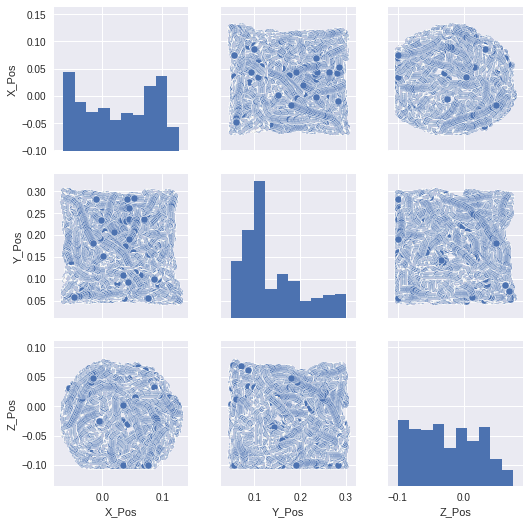

In [11]:
sns.pairplot(rat, vars=['X_Pos', 'Y_Pos', 'Z_Pos']);

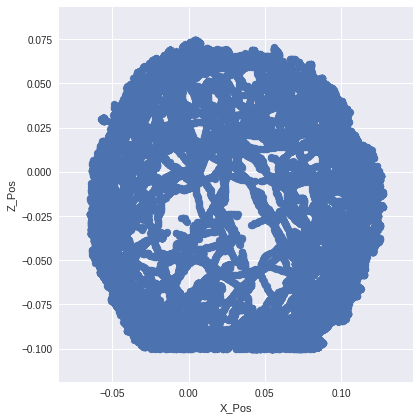

In [12]:
g = sns.FacetGrid(data=rat, size=6)
g.map(plt.scatter,'X_Pos','Z_Pos');

In [35]:
mask2 = (dfrat.session_id == 1) | (dfrat.session_id == 2)
rat2 = dfrat[mask2]

rat2.head(2)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
0,0,0.000000,0.035920,0.289473,0.066936,0.352438,0.673609,0.649645,1
1,1,0.004167,0.035986,0.289455,0.066851,0.352458,0.671568,0.651744,1


In [34]:
rat2.tail(2)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
188299,188299,784.579217,0.024437,0.107252,0.035597,0.295940,0.152368,0.942976,2
188300,188300,784.583383,0.024471,0.107232,0.035564,0.296564,0.147740,0.943516,2


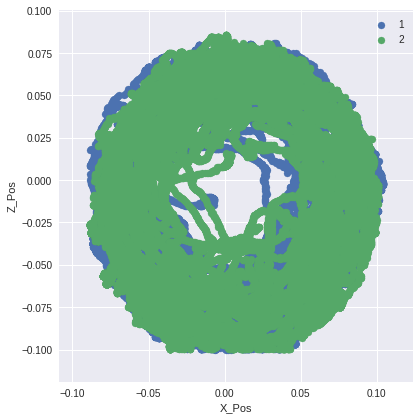

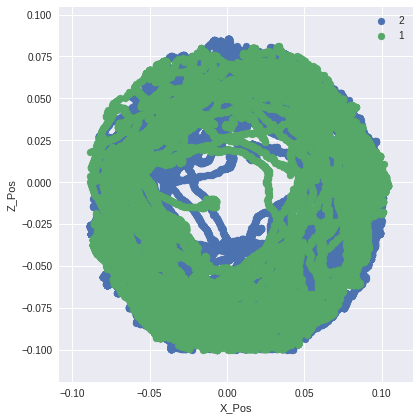

In [41]:
g = sns.FacetGrid(data=rat2, size=6, hue='session_id')
g.map(plt.scatter,'X_Pos','Z_Pos');
plt.legend()

g = sns.FacetGrid(data=rat2, size=6, hue='session_id', hue_order=[2,1])
g.map(plt.scatter,'X_Pos','Z_Pos');
plt.legend()

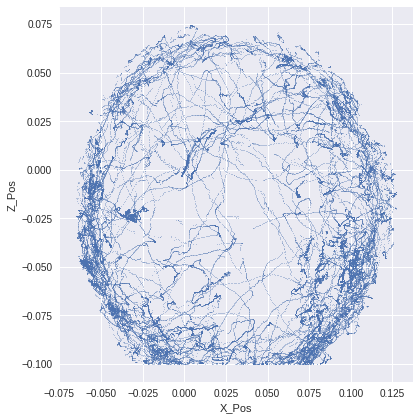

In [13]:
g = sns.FacetGrid(data=rat, size=6)
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.1);

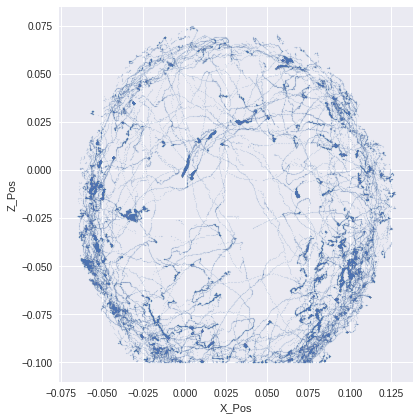

In [14]:
g = sns.FacetGrid(data=rat, size=6)
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.1);

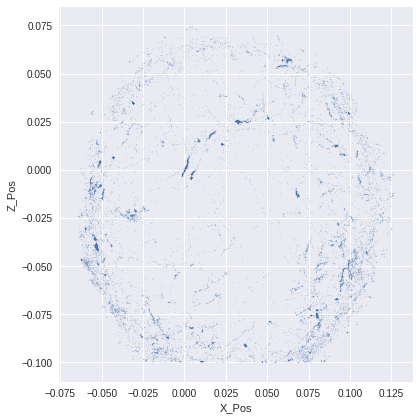

In [15]:
g = sns.FacetGrid(data=rat.sample(20000), size=6)
g.map(plt.scatter,'X_Pos','Z_Pos', s=0.9, alpha=0.1);

### Overplotting / Overdrawing

Let's consider plotting some 2D data points that come from two separate categories, here plotted as blue and red in **A** and **B** below.  When the two categories are overlaid, the appearance of the result can be very different depending on which one is plotted first:



Plots **C** and **D** shown the same distribution of points, yet they give a very different impression of which category is more common, which can lead to incorrect decisions based on this data.  Of course, both are equally common in this case.  The cause for this problem is simply occlusion:

Occlusion of data by other data is called **overplotting** or **overdrawing**, and it occurs whenever a datapoint or curve is plotted on top of another datapoint or curve, obscuring it.  It's thus a problem not just for scatterplots, as here, but for curve plots, 3D surface plots, 3D bar graphs, and any other plot type where data can be obscured.

### Saturation (and Undersaturation)

In [16]:
from matplotlib import colors

def make_heatmap(x, y, bins=20, cmap='viridis', norm=colors.Normalize(), **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower', norm=norm)


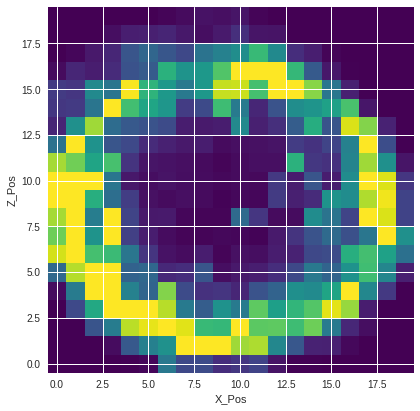

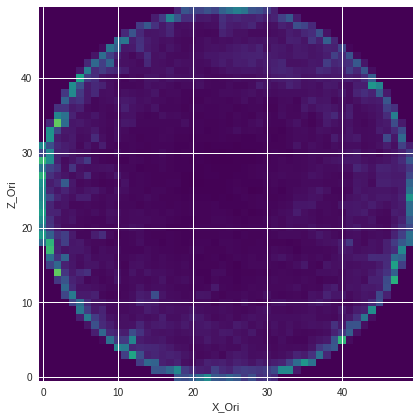

In [20]:
g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=10)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=20)

g = sns.FacetGrid(data=dfrat, size=6)
g.map(make_heatmap,'X_Ori','Z_Ori', bins=50)


### Undersampling

### Color Pallete
https://seaborn.pydata.org/tutorial/color_palettes.html

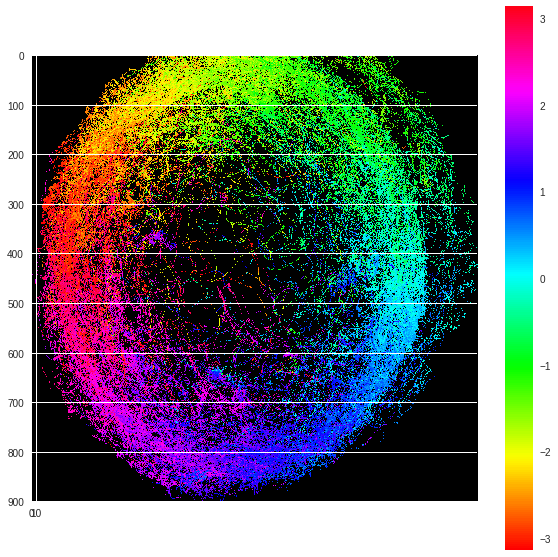

In [18]:
import datashader as ds
from matplotlib import cm
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(10, 10))
plt.imshow(theta, cmap=cm.hsv)
plt.xticks([0, 10])

plt.colorbar()

# Summary:
What should we keep in mind:
- overplotting
- 

# Thank you for your attention!

<img src="./images/pydata.png"  width="500" height="500"/>